In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#set seaborn plotting aesthetics
sns.set(style='white')

In [ ]:
# Path to data folder, may change depending on where the folder is for you
path = 'gdrive/MyDrive/RAADD/7. Data/'

In [ ]:
encode = pd.get_dummies(df['DECISION'])
df = df.merge(encode, right_index = True, left_index=True)
# df[['DECISION', '0', '1']]

In [ ]:
df

,IDNPROCEEDING,IDNCASE,BASE_CITY,HEARING_LOCATION,JUDGE_CODE,NUM_TRANSFERS,FIRST_HEARING_TIME,COUNTRY_DEPORT_1,SCHEDULED_HEARING_LOCATION,CITY,...,LANGUAGE_NULL,ABSENT_FOR_HEARING_Y,BC_STATE_REPUBLICAN,BC_STATE_DEMOCRAT,REPUBLICAN_DECISION,DEMOCRAT_DECISION,REPUBLICAN_CHARGING,DEMOCRAT_CHARGING,0,1
0,7846474,8330368,CHI,CHI,ESS,-1,900,HO,NaN,HIGHLAND PARK,...,0,0,0,1,1,0,0,1,1,0
1,7846477,8330370,PSD,PSD,NaN,-1,1300,NaN,NaN,PEARSALL,...,0,0,1,0,1,0,1,0,0,1
2,9237158,9356685,SND,CIX,LOC,-1,1230,NaN,NaN,KISSIMEE,...,0,0,0,1,1,0,1,0,1,0
3,9237161,9356688,SNA,MPL,YG1,-1,830,EC,NaN,NaN,...,0,0,1,0,1,0,1,0,1,0
4,9237162,9356689,SND,SND,SS2,-1,830,GT,NaN,ESCONDIDO,...,0,0,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,7325150,7979680,DET,DEJ,JMG,-1,1300,GT,NaN,MORENCI,...,0,0,1,0,1,0,0,1,1,0
999995,7325152,7979682,DAL,HAS,JN,-1,1130,NaN,NaN,HASKELL,...,0,0,1,0,0,1,0,1,1,0
999996,7325153,7979683,NYV,NYD,PLB,-1,1300,BH,NaN,NEW YORK,...,0,0,0,1,0,1,0,1,1,0
999997,7325155,7979684,DET,DEJ,JMG,-1,1300,GT,NaN,GRAND RAPIDS,...,0,0,1,0,1,0,0,1,1,0


# Line graph of the proportions of grants and denials by year



Note: counting "DECISION_DATE_YEAR" as year 

In [ ]:
# df[''] = pd.to_datetime(df['E_28_DATE']).dt.year
# dec_by_year = df[['DECISION', 'DECISION_DATE_YEAR']].pivot_table(index="DECISION_DATE_YEAR", columns=[0,1], values="DECISION", aggfunc=lambda x: count(x))
dec_by_year = df[[0, 1, 'DECISION_DATE_YEAR']].groupby(['DECISION_DATE_YEAR']).agg(sum)
dec_by_year['Total'] = dec_by_year[0] + dec_by_year[1]
dec_by_year['Grant Rate'] = dec_by_year[1] / dec_by_year['Total']
dec_by_year.head()


,0,1,Total,Grant Rate
DECISION_DATE_YEAR,,,,
1980,3.0,2.0,5.0,0.400000
1981,15.0,1.0,16.0,0.062500
1982,16.0,0.0,16.0,0.000000
1983,40.0,2.0,42.0,0.047619
1984,131.0,15.0,146.0,0.102740


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


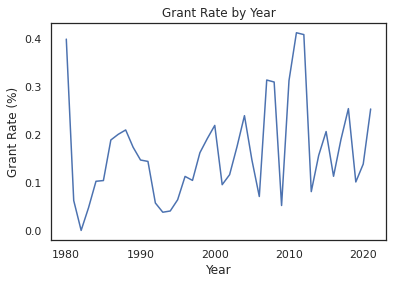

In [ ]:
x = dec_by_year.index
y = dec_by_year['Grant Rate']

sns.lineplot(x,y).set(title = 'Grant Rate by Year', xlabel = 'Year', ylabel='Grant Rate (%)');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


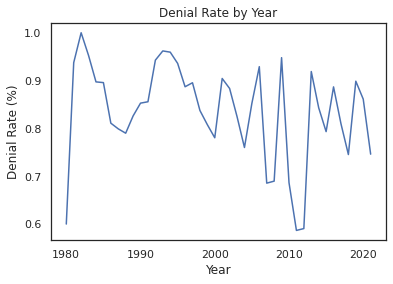

In [ ]:
x = dec_by_year.index
y = 1 - dec_by_year['Grant Rate']

sns.lineplot(x,y).set(title = 'Denial Rate by Year', xlabel = 'Year', ylabel='Denial Rate (%)');

# Stacked Bar Plot of Grant Count & Percent by Year 

In [ ]:
def plot_stacked_bar(index, y1, y2, y_label, legend, title, png):
  plt.figure(figsize=(8,6))
  bar1 = sns.barplot(x=index, y=y1, color='b')
  bar2 = sns.barplot(x=index, y=y2, bottom=y1, color='lightgrey')

  plt.xlabel("Decision Year")
  plt.ylabel(y_label)
  plt.legend(labels=legend)
  plt.title(title)

  for rect in bar1.patches[:len(x)]:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0 , height, f'{height:.0f}', ha='center', va='bottom',  fontsize=12, color = "b")

  plt.savefig(png)
  plt.show()

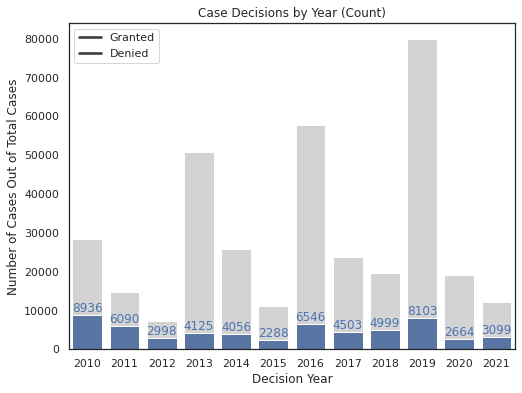

In [ ]:
decisions = dec_by_year[dec_by_year.index >= 2010]
x = decisions.index
y1 = decisions[1]
y2 = decisions[0]
plot_stacked_bar(x, y1, y2, 'Number of Cases Out of Total Cases', ['Granted', 'Denied'], 'Case Decisions by Year (Count)', 'cfr_dec_ct.png')

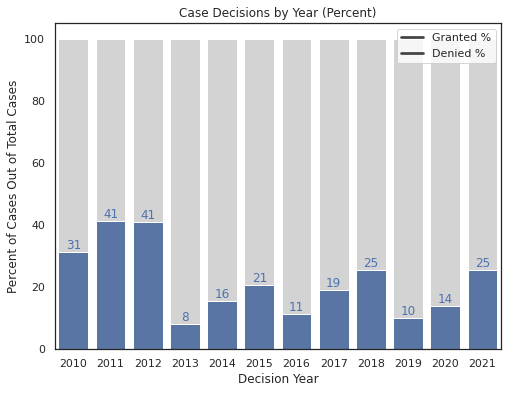

In [ ]:
x = decisions.index
y1 = decisions['Grant Rate'] * 100
y2 = (1- decisions['Grant Rate']) * 100

plot_stacked_bar(x,y1, y2, 'Percent of Cases Out of Total Cases', ['Granted %', 'Denied %'], 'Case Decisions by Year (Percent)', 'cfr_dec_ct.png')

# Histogram of the proportions of grants and denials by judge monthly decisions



In [ ]:
dec_by_judge_month = df[[0, 1, 'JUDGE_MONTH_DECISIONS']].groupby(['JUDGE_MONTH_DECISIONS']).agg(sum)

dec_by_judge_month = dec_by_judge_month.drop([-1])
dec_by_judge_month 

,0,1
JUDGE_MONTH_DECISIONS,,
1,2339.0,73.0
2,1392.0,52.0
3,804.0,63.0
4,619.0,72.0
5,414.0,56.0
...,...,...
1339,523.0,0.0
1368,691.0,1.0
1669,3.0,0.0


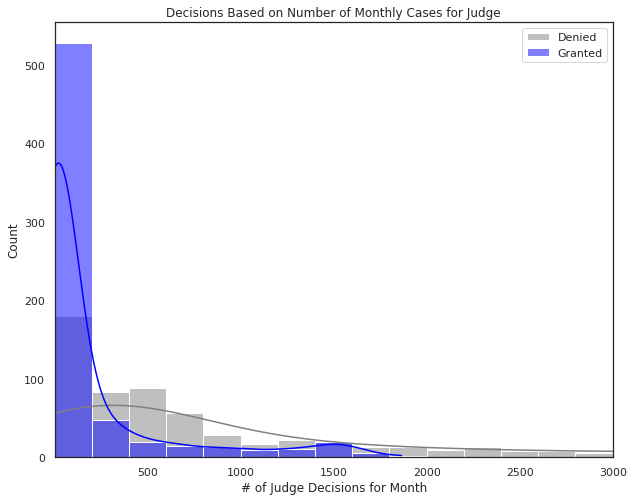

In [ ]:
plt.figure(figsize=(10,8))

bin_width = 200

ax = sns.histplot(data=dec_by_judge_month, x=0, color="grey", label= "Denied", kde=True, binwidth = bin_width)
ax = sns.histplot(data=dec_by_judge_month, x=1, color="blue", label="Granted", kde=True, binwidth = bin_width)
# ax = sns.distplot(x=dec_by_judge_month[0], color="grey", label= "Denied", kde=True, bins = (0,100))
# ax = sns.distplot(x=dec_by_judge_month[1], color="blue", label= "Granted", kde=True, bins =(0,100))
ax.set_xlim(1,3000)


plt.legend() 
plt.title('Decisions Based on Number of Monthly Cases for Judge')
plt.xlabel("# of Judge Decisions for Month")
plt.show()

# Histogram of the proportions of grants and denials by judge political party over time


Note: statistics not comprehensive

In [ ]:
dec_repub = df[['DECISION_DATE_YEAR', 'JUDGE_REPUBLICAN','JUDGE_DEMOCRAT']].groupby(['DECISION_DATE_YEAR']).agg(sum)
dec_repub
# # dec_by_year['Total'] = dec_by_year[0] + dec_by_year[1]
# # dec_by_year['Grant Rate'] = dec_by_year[1] / dec_by_year['Total']
# # dec_by_year.head()

# dec_by_judge_gender 

,JUDGE_REPUBLICAN,JUDGE_DEMOCRAT
DECISION_DATE_YEAR,,
1980,1,1
1981,1,1
1982,4,3
1983,4,4
1984,41,17
1985,127,50
1986,356,83
1987,582,68
1988,789,73


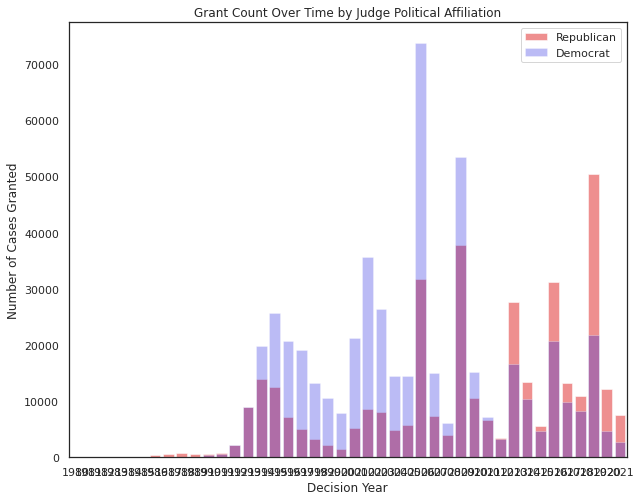

In [ ]:
plt.figure(figsize=(10,8))


import matplotlib.ticker as ticker

sns.barplot(x=dec_repub.index, y=dec_repub['JUDGE_REPUBLICAN'], color="red", label= "Republican", alpha=0.5)
sns.barplot(x=dec_repub.index, y=dec_repub['JUDGE_DEMOCRAT'], color="blue", label="Democrat", alpha=0.3)
plt.legend() 

plt.title('Grant Count Over Time by Judge Political Affiliation')
plt.xlabel('Decision Year')
plt.ylabel('Number of Cases Granted')
plt.show()